In [1]:
import sklearn 

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
from pandas.io.parsers import read_csv
import os
x_test_dir ='/data/kagglecon19/X_test.csv'
x_test = read_csv(x_test_dir)
x_train_dir ='/data/kagglecon19/X_train.csv'
x_train = read_csv(x_train_dir)
y_train_dir ='/data/kagglecon19/y_train.csv'
y_train = read_csv(y_train_dir)

In [10]:
x_train.head(6)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.10300,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.50640,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.59220,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.09930,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.46890,-10.4410
5,0_5,0,5,-0.75853,-0.63439,-0.10483,-0.10580,0.059664,0.013043,-0.013231,-0.44745,0.99281,-10.4020


In [11]:
y_train.head(6)

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles
5,5,1,tiled


In [20]:
y_train.surface.unique()

array(['fine_concrete', 'concrete', 'soft_tiles', 'tiled', 'soft_pvc',
       'hard_tiles_large_space', 'carpet', 'hard_tiles', 'wood'],
      dtype=object)

In [12]:
len(x_train)

487680

In [14]:
len(x_train.series_id.unique())

3810

In [18]:
x_train[x_train['series_id']==0][:10]

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.103000,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.506400,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.592200,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.099300,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.468900,-10.4410
5,0_5,0,5,-0.75853,-0.63439,-0.10483,-0.10580,0.059664,0.013043,-0.013231,-0.44745,0.992810,-10.4020
6,0_6,0,6,-0.75853,-0.63441,-0.10481,-0.10569,0.082140,0.044356,-0.002696,-0.14163,0.734970,-9.4296
7,0_7,0,7,-0.75852,-0.63444,-0.10480,-0.10561,0.056218,0.038162,-0.022931,-0.12160,0.075417,-8.6088
8,0_8,0,8,-0.75851,-0.63445,-0.10485,-0.10559,-0.012846,0.039004,-0.007831,1.60000,0.816110,-7.6426
9,0_9,0,9,-0.75851,-0.63443,-0.10489,-0.10567,-0.090082,0.027299,-0.009970,0.47496,0.909600,-8.8120


In [19]:
x_train[x_train['series_id']==1][:10]

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
128,1_0,1,0,-0.95896,0.24074,0.030758,-0.14661,0.283420,0.002192,-0.050810,2.18480,2.25260,-8.9503
129,1_1,1,1,-0.95890,0.24079,0.030786,-0.14693,0.108930,-0.009485,0.009155,0.49905,2.97620,-5.4953
130,1_2,1,2,-0.95889,0.24076,0.030807,-0.14702,-0.073197,0.003959,-0.023384,0.74827,1.68030,-7.3061
131,1_3,1,3,-0.95888,0.24076,0.030742,-0.14712,-0.064979,0.068265,0.018673,1.84080,0.22349,-11.4910
132,1_4,1,4,-0.95888,0.24079,0.030707,-0.14702,0.077929,0.005519,0.022119,-0.49667,-0.92942,-12.2980
133,1_5,1,5,-0.95896,0.24082,0.030674,-0.14652,0.197500,-0.059158,0.065249,2.32130,0.90256,-10.0280
134,1_6,1,6,-0.95895,0.24093,0.030685,-0.14639,0.096969,-0.046343,0.083315,0.34706,1.46730,-9.2081
135,1_7,1,7,-0.95891,0.24105,0.030729,-0.14645,-0.054210,-0.038002,0.097603,-0.62576,1.82020,-9.2065
136,1_8,1,8,-0.95885,0.24119,0.030738,-0.14660,-0.123730,0.004478,0.121890,-0.62326,1.40670,-11.8230
137,1_9,1,9,-0.95886,0.24123,0.030688,-0.14646,-0.081758,0.017352,0.120210,-0.36771,-1.35760,-16.9280


In [23]:
target_count = y_train['surface'].value_counts().reset_index().rename(columns={'index': 'target'})
target_count

,target,surface
0,concrete,779
1,soft_pvc,732
2,wood,607
3,tiled,514
4,fine_concrete,363
5,hard_tiles_large_space,308
6,soft_tiles,297
7,carpet,189
8,hard_tiles,21


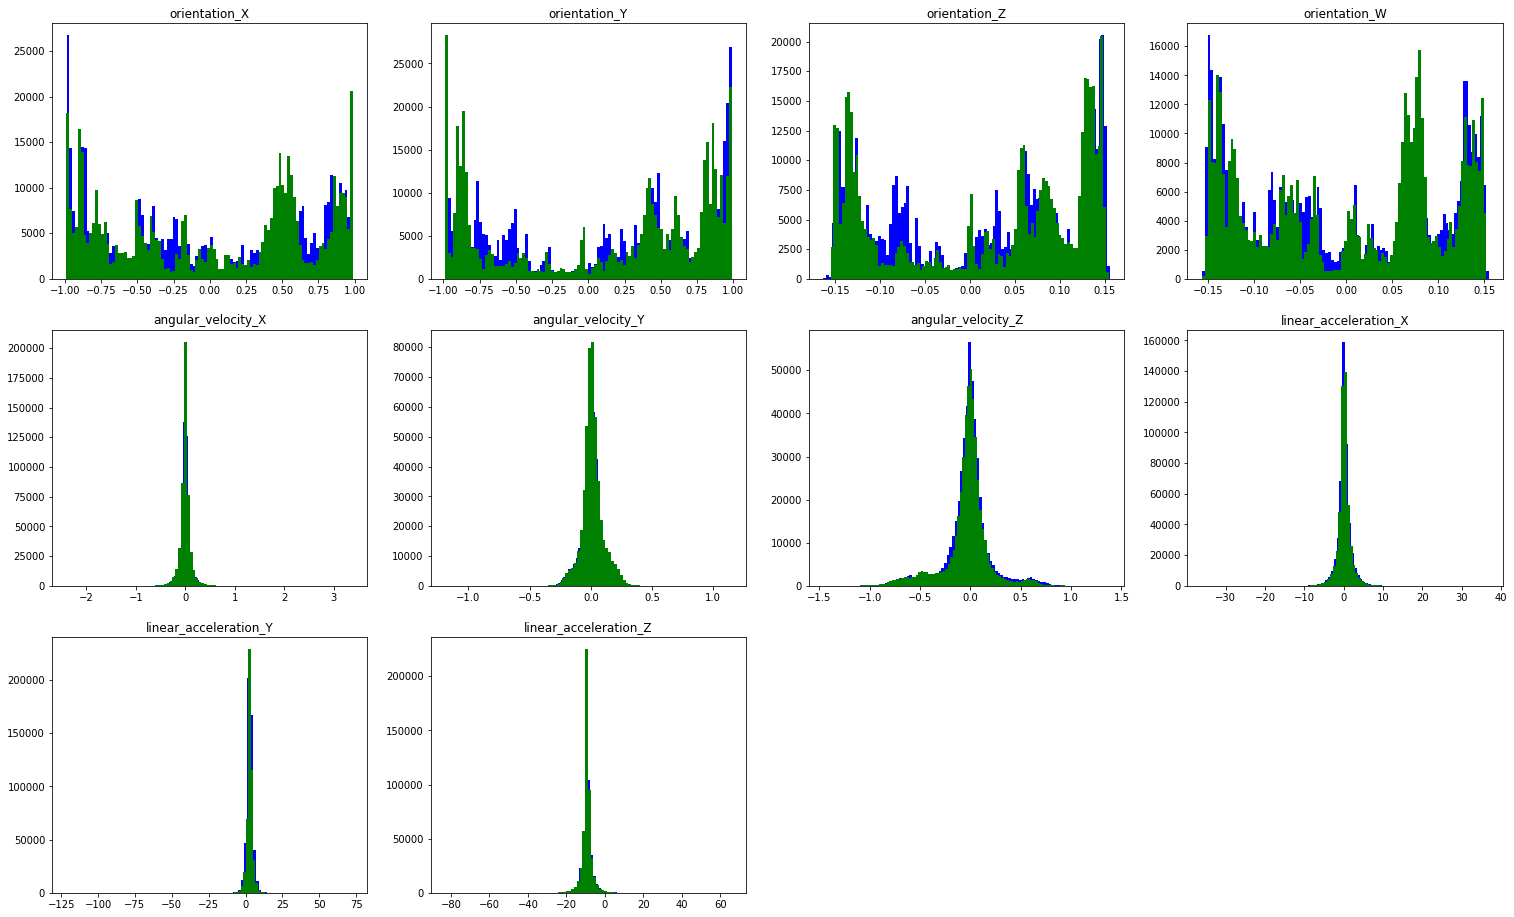

In [24]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(x_train[].columns[3:]):
    plt.subplot(3, 4, i + 1)
    plt.hist(x_train[col], color='blue', bins=100)
    plt.hist(x_test[col], color='green', bins=100)
    plt.title(col)

In [73]:
def plot_field (series):
    fig = plt.figure(figsize=(12,5))
    for i, col in enumerate(x_train.columns[3:]):
        y = x_train[x_train['series_id']==series][col]
        x = range(len(y))       
        ax = plt.subplot(2, 5, i + 1)
#         plt.figure(figsize = (2,2))
        plt.plot(x, y)


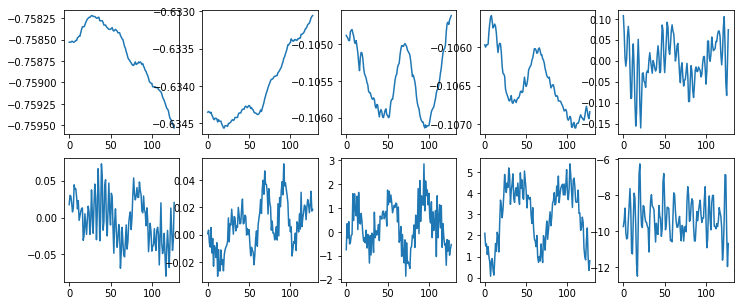

In [74]:
plot_field(0)

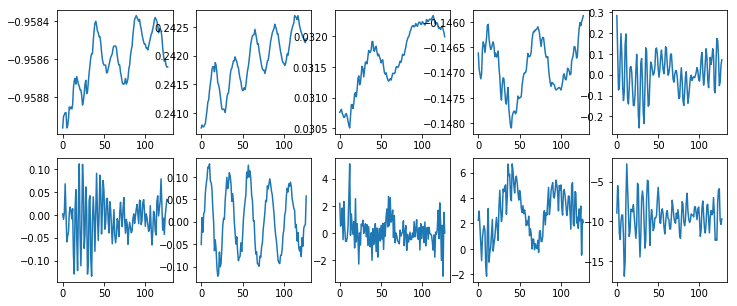

In [109]:
plot_field(1)

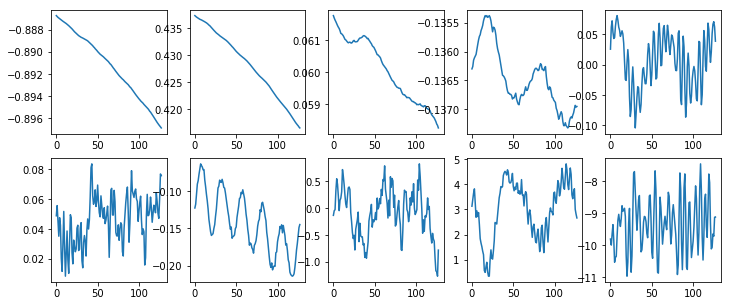

In [110]:
plot_field(4)

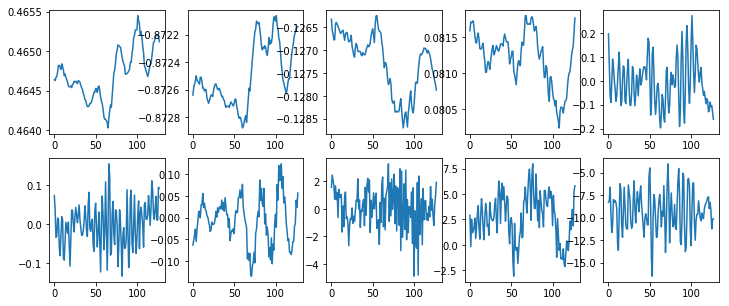

In [111]:
plot_field(5)

In [ ]:
x_train.columns[3:].groupby(['cluster']).mean()

In [81]:
x = pd.concat([x_train, y_train], axis=1, join='outer')

In [82]:
x[:10]

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,series_id,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.103000,-9.7532,0.0,13.0,fine_concrete
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.506400,-9.4128,1.0,31.0,concrete
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.592200,-8.7267,2.0,20.0,concrete
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.099300,-10.0960,3.0,31.0,concrete
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.468900,-10.4410,4.0,22.0,soft_tiles
5,0_5,0,5,-0.75853,-0.63439,-0.10483,-0.10580,0.059664,0.013043,-0.013231,-0.44745,0.992810,-10.4020,5.0,1.0,tiled
6,0_6,0,6,-0.75853,-0.63441,-0.10481,-0.10569,0.082140,0.044356,-0.002696,-0.14163,0.734970,-9.4296,6.0,34.0,soft_pvc
7,0_7,0,7,-0.75852,-0.63444,-0.10480,-0.10561,0.056218,0.038162,-0.022931,-0.12160,0.075417,-8.6088,7.0,31.0,concrete
8,0_8,0,8,-0.75851,-0.63445,-0.10485,-0.10559,-0.012846,0.039004,-0.007831,1.60000,0.816110,-7.6426,8.0,33.0,hard_tiles_large_space
9,0_9,0,9,-0.75851,-0.63443,-0.10489,-0.10567,-0.090082,0.027299,-0.009970,0.47496,0.909600,-8.8120,9.0,11.0,tiled


In [90]:
avgx = x.groupby(['surface','measurement_number']).mean().reset_index()
avgx[:10]

,surface,measurement_number,series_id,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,series_id,group_id
0,carpet,0,8.0,-0.950630,0.270675,0.033348,-0.144755,0.082760,-0.008974,-0.001987,0.919560,3.208500,-8.96495,1024.0,33.500000
1,carpet,1,9.0,0.824090,-0.545570,-0.076601,0.131800,-0.005928,-0.275140,0.677660,-2.435900,6.386300,-8.15390,1153.0,7.000000
2,carpet,2,19.0,0.418004,-0.767605,-0.112197,0.070882,-0.027995,-0.111815,0.338572,-0.693150,5.543200,-9.24580,2434.0,33.500000
3,carpet,3,11.0,0.389877,-0.634233,-0.094607,0.061851,-0.001867,-0.035105,0.254805,-0.940700,4.751100,-9.75410,1411.0,28.000000
4,carpet,5,10.0,-0.354453,0.124150,0.015127,-0.054258,-0.093478,0.022796,-0.011826,-0.192280,2.595873,-7.95280,1285.0,30.666667
5,carpet,6,11.5,0.158905,-0.699675,-0.106210,0.028342,0.084426,-0.158790,0.416335,-0.618570,3.966800,-9.34230,1478.0,42.500000
6,carpet,7,26.0,-0.813350,-0.563250,-0.089416,-0.114990,-0.005810,-0.024192,0.137690,-0.016923,2.675500,-9.33100,3335.0,60.000000
7,carpet,8,12.8,0.157124,-0.122832,-0.017260,0.025330,0.069692,0.013139,-0.045938,0.587675,2.477700,-10.63336,1646.4,35.400000
8,carpet,10,15.0,-0.942170,0.300820,0.036425,-0.143180,0.013220,-0.003843,-0.013742,-0.101590,4.813800,-8.87400,1930.0,60.000000
9,carpet,11,11.5,-0.011780,-0.031130,-0.005416,0.000470,-0.113515,0.031268,0.081102,1.140989,-0.005250,-7.03970,1483.0,42.500000


In [112]:
def plot_avg_field (surface):
    fig = plt.figure(figsize=(12,5))
    for i, col in enumerate(x_train.columns[3:]):
        y = avgx[avgx['surface']==surface][col]
        x = range(len(y))       
        ax = plt.subplot(2, 5, i + 1)
#         plt.figure(figsize = (2,2))
        plt.plot(x, y)
        plt.title(surface + str(i))

In [117]:
avgx.surface.unique()

array(['carpet', 'concrete', 'fine_concrete', 'hard_tiles',
       'hard_tiles_large_space', 'soft_pvc', 'soft_tiles', 'tiled',
       'wood'], dtype=object)

orientation_X carpet 97
orientation_X concrete 128
orientation_X fine_concrete 122
orientation_X hard_tiles 20
orientation_X hard_tiles_large_space 120
orientation_X soft_pvc 127
orientation_X soft_tiles 120
orientation_X tiled 127
orientation_X wood 127
orientation_Y carpet 97
orientation_Y concrete 128
orientation_Y fine_concrete 122
orientation_Y hard_tiles 20
orientation_Y hard_tiles_large_space 120
orientation_Y soft_pvc 127
orientation_Y soft_tiles 120
orientation_Y tiled 127
orientation_Y wood 127
orientation_Z carpet 97
orientation_Z concrete 128
orientation_Z fine_concrete 122
orientation_Z hard_tiles 20
orientation_Z hard_tiles_large_space 120
orientation_Z soft_pvc 127
orientation_Z soft_tiles 120
orientation_Z tiled 127
orientation_Z wood 127
orientation_W carpet 97
orientation_W concrete 128
orientation_W fine_concrete 122
orientation_W hard_tiles 20
orientation_W hard_tiles_large_space 120
orientation_W soft_pvc 127
orientation_W soft_tiles 120
orientation_W tiled 127
ori

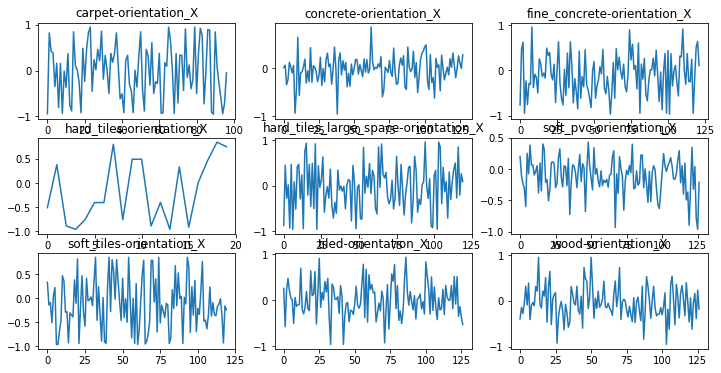

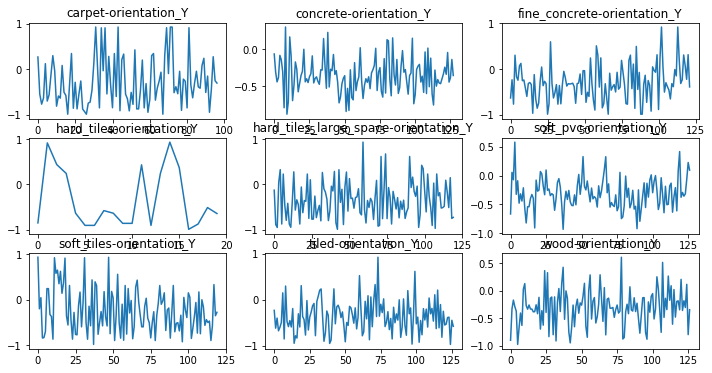

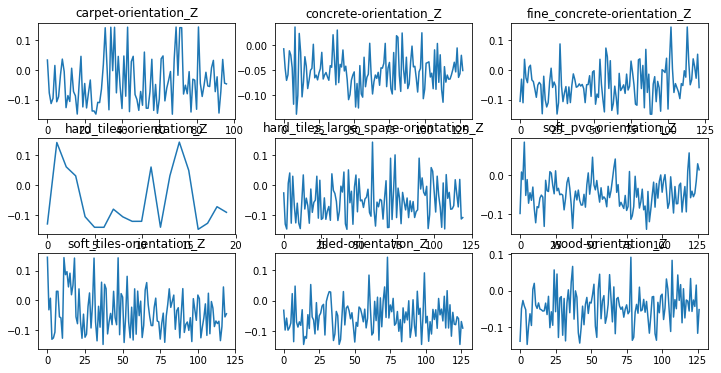

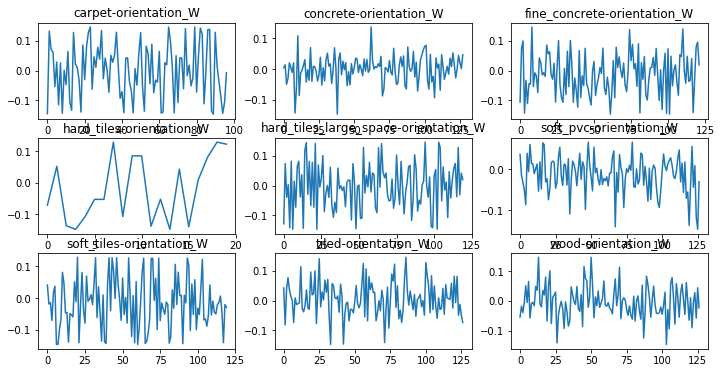

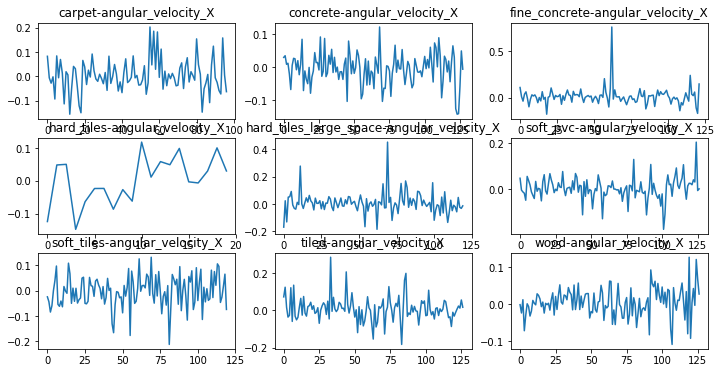

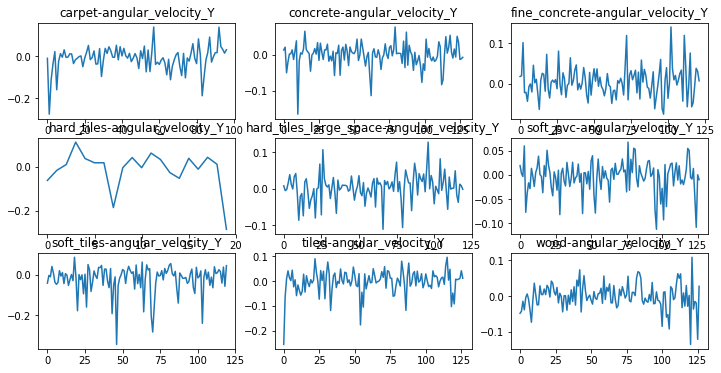

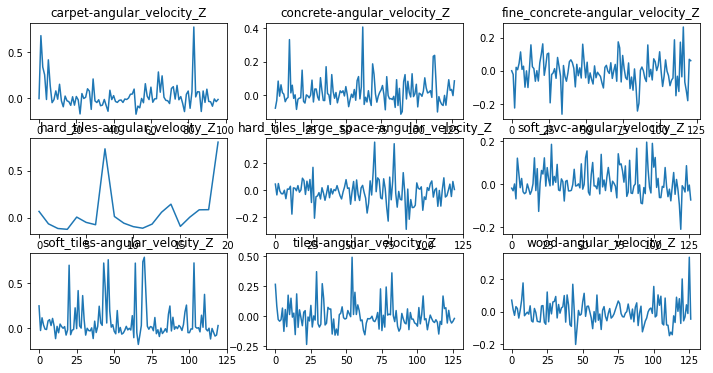

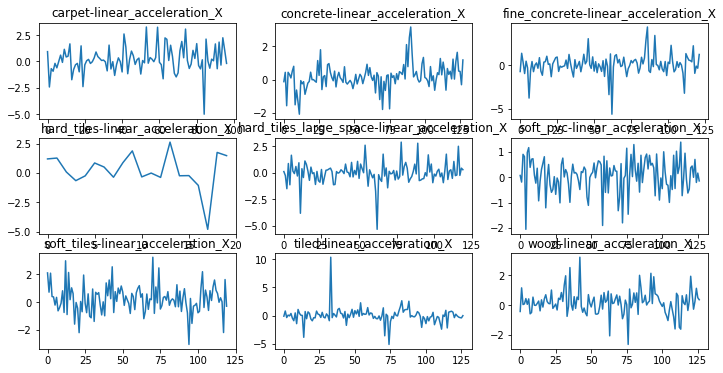

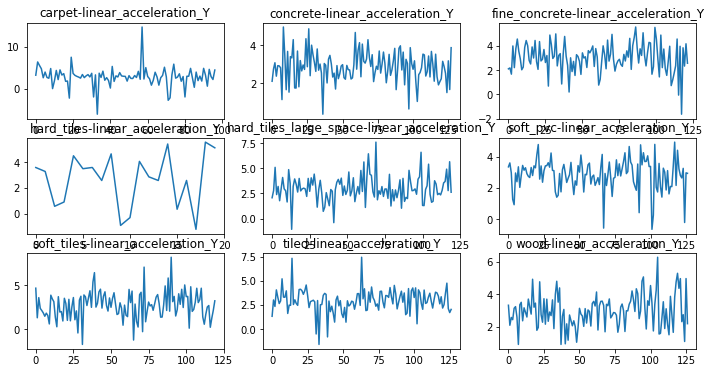

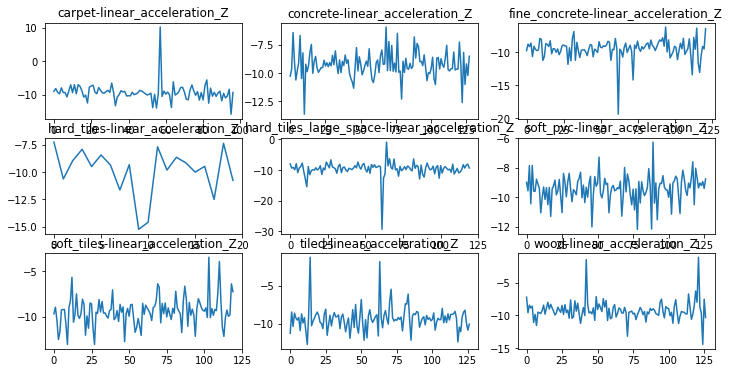

In [129]:
for col in x_train.columns[3:]:
    fig = plt.figure(figsize=(12,6))
    for i, surface in enumerate(avgx.surface.unique()): 
        
        y = avgx[avgx['surface']==surface][col]
        
        x = range(len(y))
        print(col, surface, len(y))
#         ax = plt.subplot(2, 5, i + 1)
#     #         plt.figure(figsize = (2,2))
        ax = plt.subplot(3, 3, i + 1)
        plt.plot(x, y)
        plt.title(surface + '-'+ col)



### Observations:
1. Data is clearly seasonal, find a way to remove seasonality and trend
2. For individual observations, there are clear variations between how the different models do, but when grouped together the signals are muffled
3. Why do some have shorter length? not full 128 observations?

time series posts:
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

In [141]:
test =  x_train[x_train['series_id']==0]['orientation_X']
test.index = pd.to_datetime(test.index, unit='d')
# test
decom_result = seasonal_decompose(test, model='additive')

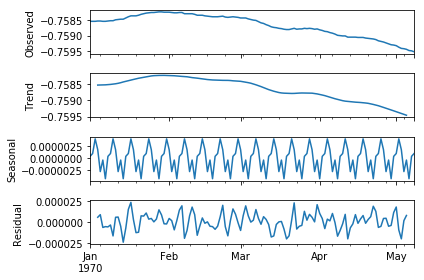

In [142]:
decom_result.plot()
plt.show()

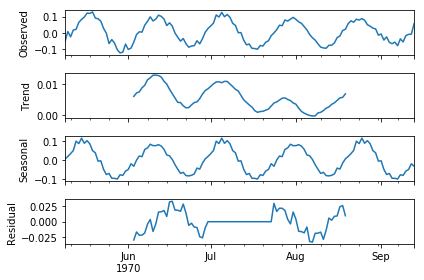

In [169]:
test1 =  x_train[x_train['series_id']==1]['angular_velocity_Z']
test1.index = pd.to_datetime(test1.index, unit='d')
# test
decom1_result = seasonal_decompose(test1, model='additive', freq=51)
decom1_result.plot()
plt.show()

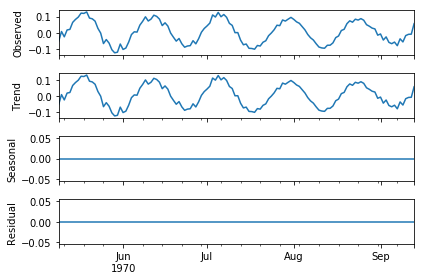

In [176]:
test2 =  x_train[x_train['series_id']==1]['angular_velocity_Z']
x2= test2.index
y2 = test2.values

[1.66442174e-03 5.00698229e+00]


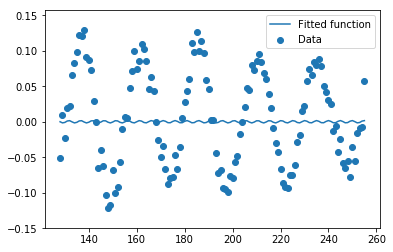

In [179]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x2, y2,
                                               p0=[5, 5])

print(params)

plt.figure(figsize=(6, 4))
plt.scatter(x2, y2, label='Data')
plt.plot(x2, test_func(x2, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

In [ ]:


def plot_field (series):
    fig = plt.figure(figsize=(12,5))
    for i, col in enumerate(x_train.columns[3:]):
        y = x_train[x_train['series_id']==series][col]
        x = range(len(y))       
        ax = plt.subplot(2, 5, i + 1)
#         plt.figure(figsize = (2,2))
        plt.plot(x, y)

In [25]:
from sklearn.metrics import *
from sklearn.model_selection import *

import keras
from keras.layers import *
from keras.callbacks import *
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers


Using TensorFlow backend.


In [26]:
class Attention(Layer):
    def __init__(self, step_dim, W_regularizer=None, b_regularizer=None, W_constraint=None, b_constraint=None, bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')
        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)
        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)
        
    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = self.add_weight((input_shape[-1],), initializer=self.init, name='{}_W'.format(self.name), regularizer=self.W_regularizer, constraint=self.W_constraint)
        self.features_dim = input_shape[-1]
        if self.bias:
            self.b = self.add_weight((input_shape[1],), initializer='zero', name='{}_b'.format(self.name), regularizer=self.b_regularizer, constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias: eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None: a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim